# Stackoverflow Survey 2018
# Being a developer in India vs. being a developer in the U.S.

For this analysis the Stackoverflow survey 2018 is being used. It can be found here:

https://insights.stackoverflow.com/survey

The descriptions for the visualizations can be found in the published blog post. Not everything that was created in this notebook was used for the post. 

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', -1)

## Reading the dataset

In [2]:
#Read 2018 survey data
zf = zipfile.ZipFile('./developer_survey_2018.zip')
df = pd.read_csv(zf.open('survey_results_public.csv'), low_memory=False)
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering","10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning a degree,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [3]:
df.shape

(98855, 129)

The dataset contains 129 columns and almost 99000 observations. 

In [4]:
# taking a look at the numercial variables
df.describe()

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


There a many categorical variables encoded as numerical, like AdsPriorities. Since I will not use all the features provided in the dataset, I will first determine the ones that are useful to my analysis and then move on with the data cleaning and wrangling, if there is some to do.

## Missing values

In [5]:
missings = df.isnull().sum()/len(df)

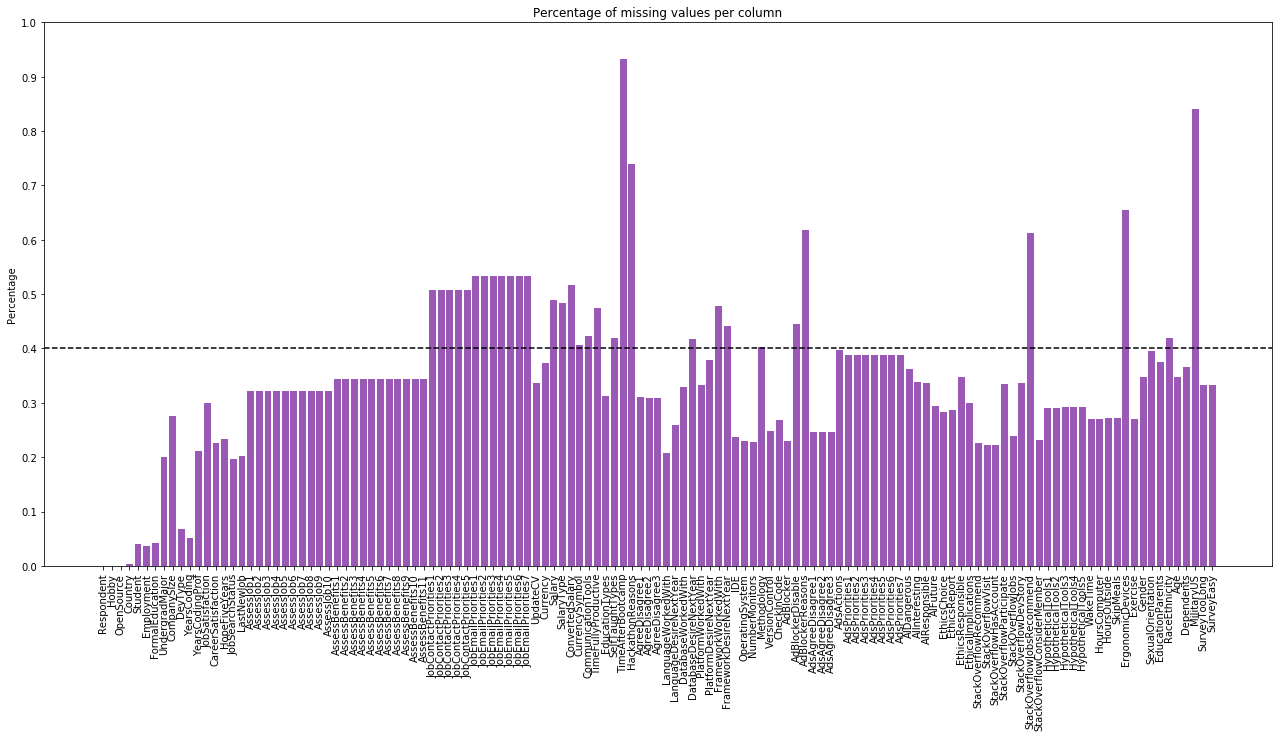

In [6]:
plt.figure(figsize=(22,10))
plt.bar(np.arange(len(missings)), missings, color='#9B59B6')
plt.axhline(0.4, color='black', linestyle='--')
plt.xticks(np.arange(len(missings)), missings.index, rotation='vertical')
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.title('Percentage of missing values per column')
plt.ylabel('Percentage');

There are actually relatively many missing values across all features. Since the order of the features is the same as the order of the questions asked in the survey, I would have suspected an increase in missing values from the beginning to the end of the survey due to people not finishing it. However, it is also possible that the survey can only be submitted once answering or skipping all the questions.

The columns with most missing values are 'TimeAfterBootcamp' (probably because only a few people did a bootcamp and therefore cannot answer this question), 'MilitaryUS' (only 20309 people from the U.S. participated in the survey, so there naturally have to be many missing values), and 'HackathonReasons' (only people who participated in a hackathon could answer this). 

**For the upcoming analysis through visualizations I only used people who answered the question I am considering.** Participants who skipped the question (NaNs) will be excluded from the visualization in order to make the output easier to interpret. I don't want readers from the blogpost to wonder about why the percentages don't add up to 100%. 

In [7]:
#number of participants from the U.S.
df.Country.value_counts()['United States']

20309

## Duplicates

In [8]:
df[df.duplicated()]

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy


There are no dupliate rows in the dataset.

## Identifying the relevant features for this analysis

My aim is to compare developers in India and developers in the U.S. by looking at their job satisfaction, their time on the current job and their hopes for the future. 

Ideally I would find some interesting differences between the two groups and show the different working environments. 

In [9]:
list(df.columns)

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

### Interesting columns:

- Hobby
- Country
- FormalEducation
- CompanySize
- DevType
- JobSatisfaction
- HopeFiveYears
- LastNewJob
- AIDangerous
- AIInteresting
- AIFuture
- WakeTime
- HoursComputer
- HoursOutside
- SkipMeals
- Exercise
- Gender
- Salary
- SalaryType

In [10]:
columns_of_interest = ['Hobby','Country','FormalEducation','CompanySize','DevType','JobSatisfaction',
                       'HopeFiveYears','LastNewJob','AIDangerous','AIInteresting','AIFuture',
                       'WakeTime','HoursComputer','HoursOutside','SkipMeals','Exercise','Gender','Salary',
                       'SalaryType', 'ErgonomicDevices', 'EducationParents']

In [11]:
# continue working with only the potentially interesting columns 
df_new = df[columns_of_interest]

In [12]:
df_new.head()

,Hobby,Country,FormalEducation,CompanySize,DevType,JobSatisfaction,HopeFiveYears,LastNewJob,AIDangerous,AIInteresting,...,WakeTime,HoursComputer,HoursOutside,SkipMeals,Exercise,Gender,Salary,SalaryType,ErgonomicDevices,EducationParents
0,Yes,Kenya,"Bachelor’s degree (BA, BS, B.Eng., etc.)",20 to 99 employees,Full-stack developer,Extremely satisfied,Working as a founder or co-founder of my own company,Less than a year ago,"Artificial intelligence surpassing human intelligence (""the singularity"")",Algorithms making important decisions,...,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,3 - 4 times per week,Male,NaN,Monthly,Standing desk,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
1,Yes,United Kingdom,"Bachelor’s degree (BA, BS, B.Eng., etc.)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,Moderately dissatisfied,Working in a different or more specialized technical role than the one I'm in now,More than 4 years ago,Increasing automation of jobs,Increasing automation of jobs,...,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Daily or almost every day,Male,51000,Yearly,Ergonomic keyboard or mouse,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
2,Yes,United States,Associate degree,20 to 99 employees,Engineering manager;Full-stack developer,Moderately satisfied,Working as a founder or co-founder of my own company,Less than a year ago,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,United States,"Bachelor’s degree (BA, BS, B.Eng., etc.)",100 to 499 employees,Full-stack developer,Neither satisfied nor dissatisfied,Working as a founder or co-founder of my own company,Less than a year ago,"Artificial intelligence surpassing human intelligence (""the singularity"")","Artificial intelligence surpassing human intelligence (""the singularity"")",...,Between 6:01 - 7:00 AM,9 - 12 hours,Less than 30 minutes,3 - 4 times per week,I don't typically exercise,Male,NaN,NaN,NaN,Some college/university study without earning a degree
4,Yes,South Africa,Some college/university study without earning a degree,"10,000 or more employees",Data or business analyst;Desktop or enterprise applications developer;Game or graphics developer;QA or test developer;Student,Slightly satisfied,Working in a different or more specialized technical role than the one I'm in now,Between 1 and 2 years ago,Algorithms making important decisions,Algorithms making important decisions,...,Before 5:00 AM,Over 12 hours,1 - 2 hours,Never,3 - 4 times per week,Male,260000,Yearly,NaN,Some college/university study without earning a degree


## Country

In [13]:
len(df.Country.unique())

184

There are 184 unique countries in the dataset. The 10 countries with most participants are the ones below. The United States and India have the most participants in this survey. Together they make up for around 1/3 of all participants. 

In [14]:
(df.Country.value_counts()/len(df))[:10]

United States         0.205442
India                 0.138799
Germany               0.065338
United Kingdom        0.062931
Canada                0.034323
Russian Federation    0.029022
France                0.026018
Brazil                0.025340
Poland                0.021466
Australia             0.020414
Name: Country, dtype: float64

In [15]:
df.Country.isnull().sum()

412

The column contains missing values. Due to the method of preparing the visualizations, it doesn't make a difference if I remove them or not. Since I don't need to remove them right now, I will leave them in, in case I need them later on.

## Job Satisfaction

In [16]:
df_new.JobSatisfaction.value_counts()

Moderately satisfied                  26005
Extremely satisfied                   12436
Slightly satisfied                    10012
Slightly dissatisfied                 7057 
Moderately dissatisfied               6318 
Neither satisfied nor dissatisfied    4966 
Extremely dissatisfied                2482 
Name: JobSatisfaction, dtype: int64

In [17]:
# define an order of values for the column that will be used in the visualizations
# otherwise the plots will look too messy; now satisfaction increases from left to right
satisfaction = ['Extremely dissatisfied','Moderately dissatisfied','Slightly dissatisfied',
                'Neither satisfied nor dissatisfied','Slightly satisfied','Moderately satisfied', 
                'Extremely satisfied']

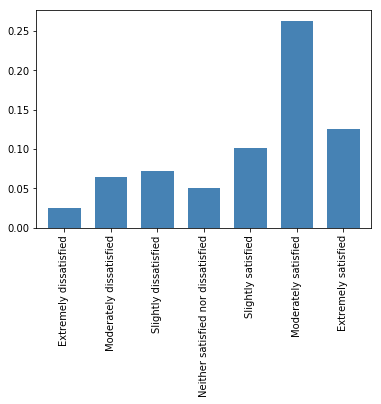

In [18]:
# distribution of job satisfaction across all participants
(df_new.JobSatisfaction.value_counts()/len(df_new)).reindex(satisfaction).plot(kind='bar', width=0.7, color='#4682B4');

- most participants are satisfied with their job

### Job Satisfaction in the U.S. and India

In [19]:
# drop all missing values from JobSatisfaction so that the proportions for each country sum up to 1
jobsat_sub = df_new.dropna(subset=['JobSatisfaction'])

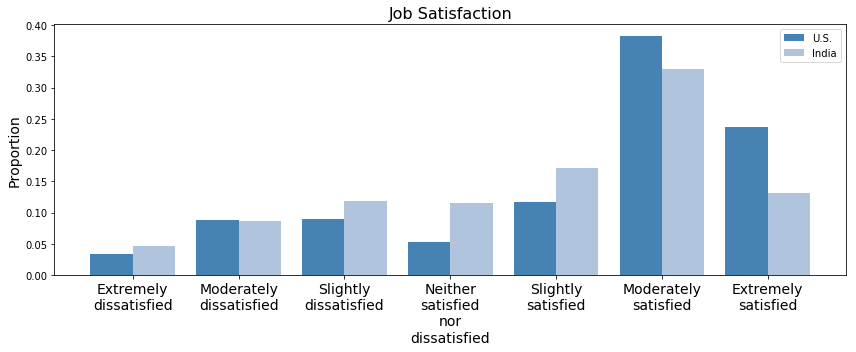

In [20]:
# define the height of the bars
## U.S. 
us = (jobsat_sub.groupby(['Country','JobSatisfaction'])['Hobby'].count()['United States']/len(jobsat_sub[jobsat_sub.Country == 'United States'])).reindex(satisfaction).values
## India
india = (jobsat_sub.groupby(['Country','JobSatisfaction'])['Hobby'].count()['India']/len(jobsat_sub[jobsat_sub.Country == 'India'])).reindex(satisfaction).values 

ind = np.arange(len(us))  # the x locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(ind - 0.2, us, width, color='#4682B4', label='U.S.')
rects2 = ax.bar(ind + 0.2 , india, width, color='#B0C4DE', label='India')
 

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Proportion', fontdict={'fontsize':14})
ax.set_title('Job Satisfaction', fontdict={'fontsize':16})
ax.set_xticks(ind)
ax.set_xticklabels(('Extremely\ndissatisfied','Moderately\ndissatisfied','Slightly\ndissatisfied',
                'Neither\nsatisfied\nnor\ndissatisfied','Slightly\nsatisfied','Moderately\nsatisfied', 
                'Extremely\nsatisfied'), fontdict={'fontsize':14}, rotation_mode='anchor')
ax.legend()
plt.tight_layout()
plt.savefig('JobSatisfaction.png', dpi=600);

In [21]:
#looking up the actual numbers for the blog post
(jobsat_sub.groupby(['Country','JobSatisfaction'])['Hobby'].count()['United States']/len(jobsat_sub[jobsat_sub.Country == 'United States'])).reindex(satisfaction)

JobSatisfaction
Extremely dissatisfied                0.033188
Moderately dissatisfied               0.087892
Slightly dissatisfied                 0.089532
Neither satisfied nor dissatisfied    0.052748
Slightly satisfied                    0.117358
Moderately satisfied                  0.381917
Extremely satisfied                   0.237365
Name: Hobby, dtype: float64

In [22]:
#looking up the actual numbers for the blog post
(jobsat_sub.groupby(['Country','JobSatisfaction'])['Hobby'].count()['India']/len(jobsat_sub[jobsat_sub.Country == 'India'])).reindex(satisfaction) 

JobSatisfaction
Extremely dissatisfied                0.047033
Moderately dissatisfied               0.086268
Slightly dissatisfied                 0.119045
Neither satisfied nor dissatisfied    0.114780
Slightly satisfied                    0.171073
Moderately satisfied                  0.329840
Extremely satisfied                   0.131961
Name: Hobby, dtype: float64

## Wakeup Times (not used in blogpost)

In [23]:
df.WakeTime.unique()

array(['Between 5:00 - 6:00 AM', 'Between 6:01 - 7:00 AM', nan,
       'Before 5:00 AM', 'Between 7:01 - 8:00 AM',
       'Between 9:01 - 10:00 AM', 'I do not have a set schedule',
       'Between 8:01 - 9:00 AM', 'Between 10:01 - 11:00 AM',
       'Between 11:01 AM - 12:00 PM', 'After 12:01 PM',
       'I work night shifts'], dtype=object)

In [24]:
#Encode WakeUp into fewer categories
wakeup = {'I work night shifts' : 'nightowl', 
          'After 12:01 PM' : 'nightowl', 
          'Before 5:00 AM' : 'earlybird', 
          'Between 5:00 - 6:00 AM' : 'earlybird',
          'Between 6:01 - 7:00 AM' : 'between6and8',
          'Between 7:01 - 8:00 AM' : 'between6and8',
          'Between 8:01 - 9:00 AM' : 'between8and10',
          'Between 9:01 - 10:00 AM' : 'between8and10',
          'Between 10:01 - 11:00 AM' : 'between10and12',
          'Between 11:01 AM - 12:00 PM' : 'between10and12'}

In [25]:
df_new['wakeup'] = df_new['WakeTime'].map(wakeup)

/home/annalena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
times = ['earlybird','between6and8','between8and10','between10and12','nightowl']

In [27]:
(df_new.groupby(['Country','wakeup'])['Hobby'].count()['United States']/len(df_new[df_new.Country == 'United States'])).reindex(times)


wakeup
earlybird         0.164065
between6and8      0.481068
between8and10     0.137821
between10and12    0.008962
nightowl          0.002462
Name: Hobby, dtype: float64

In [28]:
#drop all participants who did not provide an answer for their wakeup time
wakeup_sub = df_new.dropna(subset=['wakeup'])

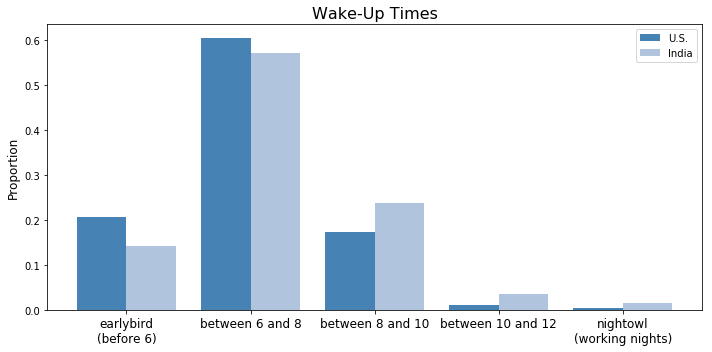

In [29]:
# plot wakeup times for both countries
us = (wakeup_sub.groupby(['Country','wakeup'])['Hobby'].count()['United States']/len(wakeup_sub[wakeup_sub.Country == 'United States'])).reindex(times).values
india = (wakeup_sub.groupby(['Country','wakeup'])['Hobby'].count()['India']/len(wakeup_sub[wakeup_sub.Country == 'India'])).reindex(times).values 

ind = np.arange(len(us))  # the x locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind - 0.2, us, width, color='#4682B4', label='U.S.')
rects2 = ax.bar(ind + 0.2 , india, width, color='#B0C4DE', label='India')

ax.set_ylabel('Proportion', fontdict={'fontsize':12})
ax.set_title('Wake-Up Times', fontdict={'fontsize':16})
ax.set_xticks(ind)
ax.set_xticklabels(('earlybird\n(before 6)','between 6 and 8','between 8 and 10','between 10 and 12','nightowl\n(working nights)'), fontdict={'fontsize':12}, rotation_mode='anchor')
ax.legend()
plt.tight_layout()

## Company size (not used in blog post)

In [30]:
# only use observations that provided an answer to this questions
comp_sub = df_new.dropna(subset=['CompanySize'])

In [31]:
# proprtion of people who provided an answer to this question
comp_sub.shape[0]/len(df_new)

0.7235951646350716

In [32]:
# defining a list of company sizes for reindexing in the plots (all in the same order, increasing size from left 
# to right)
sizes = ['Fewer than 10 employees', '10 to 19 employees', '20 to 99 employees', '100 to 499 employees',
         '500 to 999 employees', '1,000 to 4,999 employees', '5,000 to 9,999 employees','10,000 or more employees']

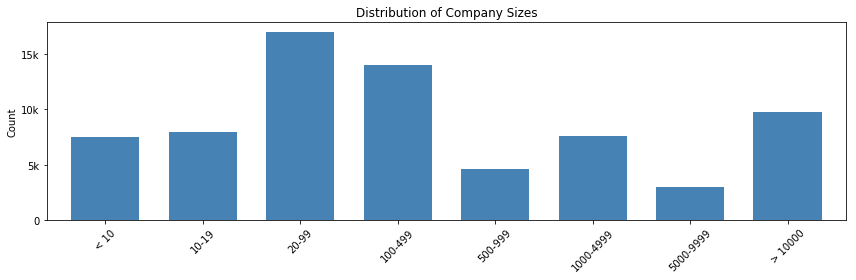

In [33]:
plt.figure(figsize=(12,4))
df.CompanySize.value_counts().reindex(sizes).plot(kind="bar",color='#4682B4', width=0.7)
plt.xticks(ticks=np.arange(0,8), 
           labels=['< 10','10-19','20-99','100-499','500-999','1000-4999','5000-9999','> 10000'],
           rotation=45)
plt.yticks(ticks=np.arange(0,17000,5000), labels=['0','5k','10k','15k'])
plt.ylabel('Count')
plt.title('Distribution of Company Sizes')
plt.tight_layout()

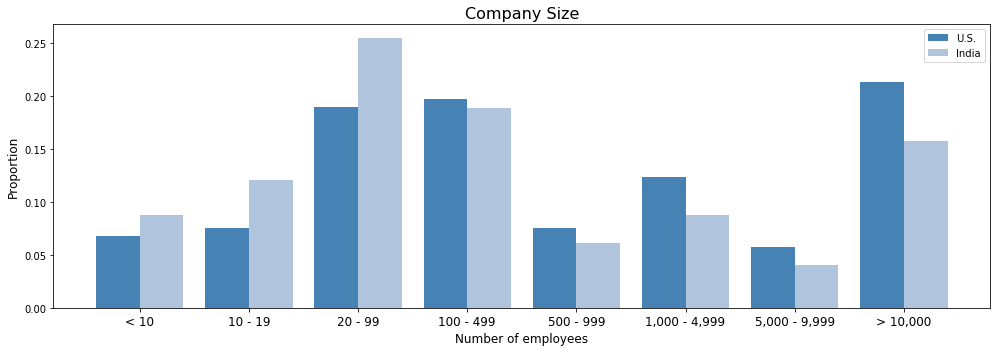

In [34]:
# defining the height of the bars
us = (comp_sub.groupby(['Country','CompanySize'])['Hobby'].count()['United States']/len(comp_sub[comp_sub.Country == 'United States'])).reindex(sizes).values
india = (comp_sub.groupby(['Country','CompanySize'])['Hobby'].count()['India']/len(comp_sub[comp_sub.Country == 'India'])).reindex(sizes).values 

ind = np.arange(len(us))  # the x locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(14,5))
rects1 = ax.bar(ind - 0.2, us, width, color='#4682B4', label='U.S.')
rects2 = ax.bar(ind + 0.2 , india, width, color='#B0C4DE', label='India')

ax.set_ylabel('Proportion', fontdict={'fontsize':12})
ax.set_title('Company Size', fontdict={'fontsize':16})
ax.set_xticks(ind)
ax.set_xticklabels(('< 10', '10 - 19', '20 - 99', '100 - 499',
                    '500 - 999', '1,000 - 4,999', '5,000 - 9,999',
                    '> 10,000'), fontdict={'fontsize':12}, rotation_mode='anchor')
ax.set_xlabel('Number of employees', fontdict={'fontsize':12})
ax.legend()
plt.tight_layout()
plt.savefig('CompanySize.png', dpi=600);

## What developers hope to be doing in 5 years

In [35]:
df_new.HopeFiveYears.value_counts()

Working in a different or more specialized technical role than the one I'm in now    25643
Working as a founder or co-founder of my own company                                 19444
Doing the same work                                                                  14724
Working as an engineering manager or other functional manager                        7483 
Working as a product manager or project manager                                      5004 
Working in a career completely unrelated to software development                     2151 
Retirement                                                                           1269 
Name: HopeFiveYears, dtype: int64

There were 7 options for this answer. 

In [36]:
#create the subset for the visualization (only including people who provided an answer
#to the question)
hope = df_new.dropna(subset=['HopeFiveYears'])

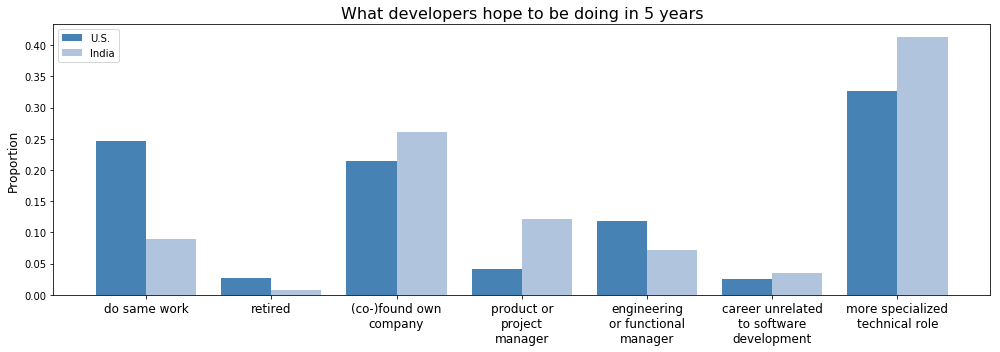

In [37]:
#Visualize the proportion of developers in each country by the kind of thing they want
#to be doing in 5 years

us = (hope.groupby(['Country','HopeFiveYears'])['Hobby'].count()['United States']/len(hope[hope.Country == 'United States'])).values
india = (hope.groupby(['Country','HopeFiveYears'])['Hobby'].count()['India']/len(hope[hope.Country == 'India'])).values 

ind = np.arange(len(us))  # the x locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(14,5))
rects1 = ax.bar(ind - 0.2, us, width, color='#4682B4', label='U.S.')
rects2 = ax.bar(ind + 0.2 , india, width, color='#B0C4DE', label='India')

ax.set_ylabel('Proportion', fontdict={'fontsize':12})
ax.set_title('What developers hope to be doing in 5 years', fontdict={'fontsize':16})
ax.set_xticks(ind)
ax.set_xticklabels(('do same work','retired','(co-)found own\ncompany',
                    'product or\nproject\nmanager','engineering\nor functional\nmanager',
                    'career unrelated\nto software\ndevelopment','more specialized\ntechnical role'), 
                    fontdict={'fontsize':12}, rotation_mode='anchor')
ax.legend()
plt.tight_layout()
plt.savefig('FiveYears.png', dpi=600);

In [38]:
#get the actual numbers for the plot above to use for the blogpost
hope.groupby(['Country','HopeFiveYears'])['Hobby'].count()['United States']/len(hope[hope.Country == 'United States'])

HopeFiveYears
Doing the same work                                                                  0.246903
Retirement                                                                           0.027421
Working as a founder or co-founder of my own company                                 0.213904
Working as a product manager or project manager                                      0.041513
Working as an engineering manager or other functional manager                        0.118783
Working in a career completely unrelated to software development                     0.025189
Working in a different or more specialized technical role than the one I'm in now    0.326287
Name: Hobby, dtype: float64

In [39]:
#get the actual numbers for the plot above to use for the blogpost
hope.groupby(['Country','HopeFiveYears'])['Hobby'].count()['India']/len(hope[hope.Country == 'India'])

HopeFiveYears
Doing the same work                                                                  0.090201
Retirement                                                                           0.007895
Working as a founder or co-founder of my own company                                 0.261086
Working as a product manager or project manager                                      0.121025
Working as an engineering manager or other functional manager                        0.072139
Working in a career completely unrelated to software development                     0.035042
Working in a different or more specialized technical role than the one I'm in now    0.412611
Name: Hobby, dtype: float64

### What are the proportions for what developers want to be doing in 5 years across the whole dataset?

In [40]:
df.HopeFiveYears.value_counts()/len(df)

Working in a different or more specialized technical role than the one I'm in now    0.259400
Working as a founder or co-founder of my own company                                 0.196692
Doing the same work                                                                  0.148945
Working as an engineering manager or other functional manager                        0.075697
Working as a product manager or project manager                                      0.050620
Working in a career completely unrelated to software development                     0.021759
Retirement                                                                           0.012837
Name: HopeFiveYears, dtype: float64

## Last Job Change

In [41]:
df_new.LastNewJob.value_counts()

Less than a year ago         27321
Between 1 and 2 years ago    17332
More than 4 years ago        14871
Between 2 and 4 years ago    14792
I've never had a job         4573 
Name: LastNewJob, dtype: int64

In [42]:
# create a list of ordered items for the plot
lastjob = ['I\'ve never had a job','Less than a year ago','Between 1 and 2 years ago',
           'Between 2 and 4 years ago','More than 4 years ago']

In [43]:
# only keep observations that provided an answer to this question
newjob_sub = df_new.dropna(subset=['LastNewJob'])

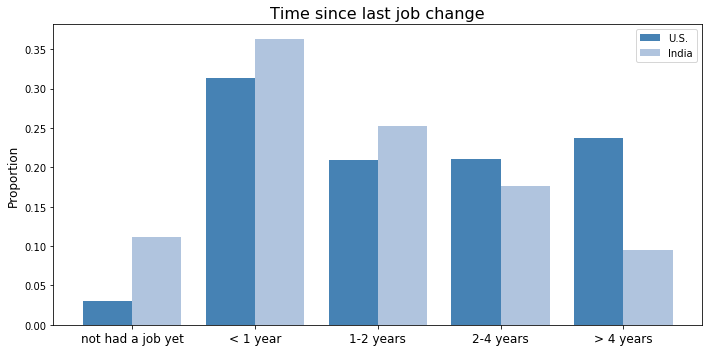

In [44]:
# height of the bars
us = (newjob_sub.groupby(['Country','LastNewJob'])['Hobby'].count()['United States']/len(newjob_sub[newjob_sub.Country == 'United States'])).reindex(lastjob).values
india = (newjob_sub.groupby(['Country','LastNewJob'])['Hobby'].count()['India']/len(newjob_sub[newjob_sub.Country == 'India'])).reindex(lastjob).values 

ind = np.arange(len(us))  # the x locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind - 0.2, us, width, color='#4682B4', label='U.S.')
rects2 = ax.bar(ind + 0.2 , india, width, color='#B0C4DE', label='India')

ax.set_ylabel('Proportion', fontdict={'fontsize':12})
ax.set_title('Time since last job change', fontdict={'fontsize':16})
ax.set_xticks(ind)
ax.set_xticklabels(('not had a job yet','< 1 year','1-2 years','2-4 years','> 4 years'), fontdict={'fontsize':12}, rotation_mode='anchor')
ax.legend()
plt.tight_layout()
plt.savefig('JobChange.png', dpi=600);

In [45]:
# get actual numbers for the blogpost
(newjob_sub.groupby(['Country','LastNewJob'])['Hobby'].count()['United States']/len(newjob_sub[newjob_sub.Country == 'United States'])).reindex(lastjob)

LastNewJob
I've never had a job         0.029660
Less than a year ago         0.313049
Between 1 and 2 years ago    0.208756
Between 2 and 4 years ago    0.210628
More than 4 years ago        0.237906
Name: Hobby, dtype: float64

In [46]:
# get actual numbers for the blogpost
(newjob_sub.groupby(['Country','LastNewJob'])['Hobby'].count()['India']/len(newjob_sub[newjob_sub.Country == 'India'])).reindex(lastjob)

LastNewJob
I've never had a job         0.111911
Less than a year ago         0.363505
Between 1 and 2 years ago    0.252829
Between 2 and 4 years ago    0.176918
More than 4 years ago        0.094836
Name: Hobby, dtype: float64

### How big is the "not had a job yet" percentage for the whole dataset?

In [47]:
(df.LastNewJob.value_counts()/len(df)).reindex(lastjob)

I've never had a job         0.046260
Less than a year ago         0.276374
Between 1 and 2 years ago    0.175327
Between 2 and 4 years ago    0.149633
More than 4 years ago        0.150432
Name: LastNewJob, dtype: float64

## Hours in front of the computer (not used in the blogpost)

In [48]:
df_new.HoursComputer.value_counts()

9 - 12 hours        37983
5 - 8 hours         22070
Over 12 hours       9549 
1 - 4 hours         2349 
Less than 1 hour    182  
Name: HoursComputer, dtype: int64

In [49]:
# list of ordered items for plot
hours = ['Less than 1 hour','1 - 4 hours','5 - 8 hours','9 - 12 hours','Over 12 hours']

In [50]:
# subset without missing values in this feature
hours_sub = df_new.dropna(subset=['HoursComputer'])

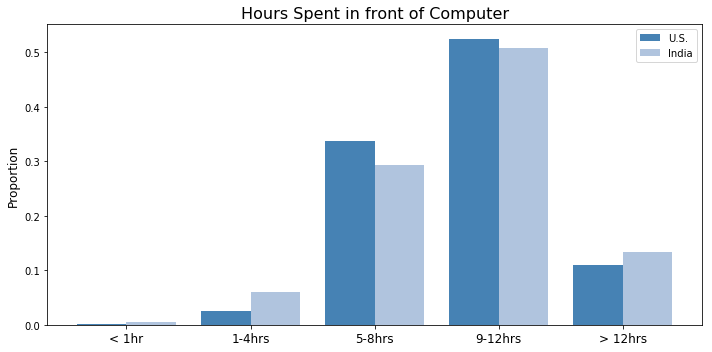

In [51]:
us = (hours_sub.groupby(['Country','HoursComputer'])['Hobby'].count()['United States']/len(hours_sub[hours_sub.Country == 'United States'])).reindex(hours).values
india = (hours_sub.groupby(['Country','HoursComputer'])['Hobby'].count()['India']/len(hours_sub[hours_sub.Country == 'India'])).reindex(hours).values 

ind = np.arange(len(us))  # the x locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(ind - 0.2, us, width, color='#4682B4', label='U.S.')
rects2 = ax.bar(ind + 0.2 , india, width, color='#B0C4DE', label='India')
 

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Proportion', fontdict={'fontsize':12})
ax.set_title('Hours Spent in front of Computer', fontdict={'fontsize':16})
ax.set_xticks(ind)
ax.set_xticklabels(('< 1hr','1-4hrs','5-8hrs','9-12hrs','> 12hrs'), fontdict={'fontsize':12}, rotation_mode='anchor')
ax.legend()
plt.tight_layout()

### Wakeup time across multiple company sizes (not used in blogpost)

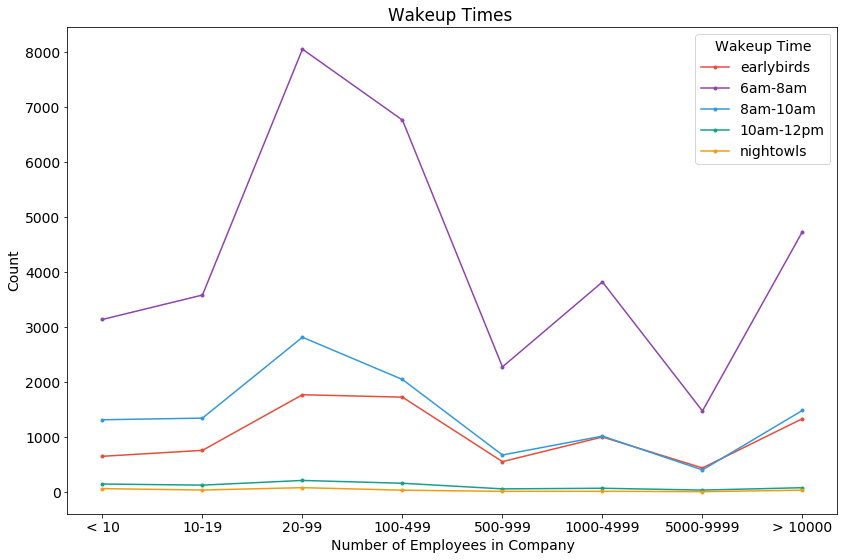

In [53]:
#Plotting WakeUp Times vs. Company Size
early = df_new.groupby(['wakeup','CompanySize'])['Hobby'].count()['earlybird'].reindex(sizes).values
sixeight = df_new.groupby(['wakeup','CompanySize'])['Hobby'].count()['between6and8'].reindex(sizes).values
eightten = df_new.groupby(['wakeup','CompanySize'])['Hobby'].count()['between8and10'].reindex(sizes).values
tentwelve = df_new.groupby(['wakeup','CompanySize'])['Hobby'].count()['between10and12'].reindex(sizes).values
late = df_new.groupby(['wakeup','CompanySize'])['Hobby'].count()['nightowl'].reindex(sizes).values

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 14})
r = [0,1,2,3,4,5,6,7]

plt.plot(early, label='earlybirds', marker='.', color='#E74C3C')
plt.plot(sixeight, label='6am-8am', color='#8E44AD', marker='.')
plt.plot(eightten, label='8am-10am', color='#3498DB', marker='.')
plt.plot(tentwelve, label='10am-12pm', color='#16A085', marker='.')
plt.plot(late, label='nightowls', color='#F39C12', marker='.')

plt.xticks(r, ['< 10','10-19','20-99','100-499','500-999','1000-4999','5000-9999','> 10000'])
plt.xlabel('Number of Employees in Company')
#plt.yticks(np.arange(0,50000,10000),['0','10k','20k','30k','40k','50k'])
plt.ylabel('Count')
plt.title('Wakeup Times ')
lgd = plt.legend(bbox_to_anchor=(1,1), title='Wakeup Time')
plt.tight_layout()
plt.savefig('WakeupTimesByCompanySize.png', dpi=600);